In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('tmp.csv',sep = ',')

In [3]:
# checking the shape of the data(row, column)
train_data.shape

(7946, 9)

In [5]:
# checking the head of the data

train_data.head()

,filename,width,height,depth,class,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,plastic_bag,244.0,67.0,608.0,356.0
1,200801095.jpg,800,600,3,plastic_bag,22.0,422.0,210.0,550.0
2,200801097.jpg,800,600,3,tire,411.0,100.0,800.0,555.0
3,200801097.jpg,800,600,3,plastic_bag,291.0,1.0,800.0,105.0
4,200801097.jpg,800,600,3,plastic_bag,177.0,112.0,409.0,600.0


In [6]:
objkey = train_data['class'].value_counts().keys().tolist()
print(objkey)

['bucket', 'tire', 'bowl', 'plastic_bag', 'bottle', 'box', 'styrofoam', 'plate', 'water_tower', 'tub', 'toilet', 'aquarium', 'washing_machine']


In [7]:
transformation_obj = {
    "aquarium":1, "bottle":2, "bowl":3, "box":4, "bucket":5,
    "plastic_bag":6, "plate":7, "styrofoam":8, "tire":9,
    "toilet":10, "tub":11, "washing_machine":12, "water_tower":13
}
train_data['class'] = train_data['class'].map(transformation_obj)


In [8]:
#checking the NA values
train_data.isna().sum()

filename     0
width        0
height       0
depth        0
class       11
xmin        11
ymin        11
xmax        11
ymax        11
dtype: int64

In [9]:
#checking the Null values in the dataset
train_data.isnull().sum()

filename     0
width        0
height       0
depth        0
class       11
xmin        11
ymin        11
xmax        11
ymax        11
dtype: int64

In [10]:
train_data.dropna(inplace=True)
train_data.isna().sum()

filename    0
width       0
height      0
depth       0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

In [11]:
h = train_data['filename'].value_counts().keys().tolist()
len(h)

2660

In [12]:
# checking the head of the data after changing 'object_name' 

train_data.head()

,filename,width,height,depth,class,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,6.0,244.0,67.0,608.0,356.0
1,200801095.jpg,800,600,3,6.0,22.0,422.0,210.0,550.0
2,200801097.jpg,800,600,3,9.0,411.0,100.0,800.0,555.0
3,200801097.jpg,800,600,3,6.0,291.0,1.0,800.0,105.0
4,200801097.jpg,800,600,3,6.0,177.0,112.0,409.0,600.0


In [13]:
train_data['filename'].value_counts()

201302192.jpg     48
201605014.jpg     47
20081112.jpg      31
201109061.jpg     29
201605183.jpg     27
201112025.jpg     24
201308212.jpg     23
201009016.jpg     21
201011119.jpg     20
201509112.jpg     20
20121024.jpg      19
2008110511.jpg    19
201109165.jpg     18
201410242.jpg     18
2013062417.jpg    18
201109066.jpg     17
200907231.jpg     17
201505146.jpg     17
2009070355.jpg    16
20130117.jpg      16
201109063.jpg     16
201506184.jpg     16
201309234.jpg     16
2008120631.jpg    16
200807251.jpg     15
201410081.jpg     15
201510213.jpg     15
201010271.jpg     15
201009246.jpg     15
2010081923.jpg    15
                  ..
201404015.jpg      1
20090720.jpg       1
201607021.jpg      1
201511092.jpg      1
201406209.jpg      1
201009025.jpg      1
201708044.jpg      1
20110328.jpg       1
201211307.jpg      1
2010081920.jpg     1
200906302.jpg      1
2012121013.jpg     1
201607251.jpg      1
201611164.jpg      1
201603233.jpg      1
201506303.jpg      1
201008129.jpg

In [14]:
df_drop = train_data.drop(['filename', 'class'], axis=1)
df_drop.head()

,width,height,xmin,ymin,xmax,ymax
0,800,600,244.0,67.0,608.0,356.0
1,800,600,22.0,422.0,210.0,550.0
2,800,600,411.0,100.0,800.0,555.0
3,800,600,291.0,1.0,800.0,105.0
4,800,600,177.0,112.0,409.0,600.0


In [15]:
# Normalization
df_norm = (df_drop - df_drop.mean()) / df_drop.std()
df_norm.head()

,width,height,xmin,ymin,xmax,ymax
0,3.016414,2.885104,0.617057,-0.869933,2.709187,1.318316
1,3.016414,2.885104,-1.230069,3.224844,-0.473657,3.323515
2,3.016414,2.885104,2.006562,-0.489292,4.244629,3.375195
3,3.016414,2.885104,1.008115,-1.631215,4.244629,-1.276038
4,3.016414,2.885104,0.059591,-0.350877,1.117765,3.840319


In [16]:
from sklearn.decomposition import PCA

In [17]:
y = train_data['class'].values
y

array([6., 6., 9., ..., 9., 2., 5.])

In [18]:
arr = df_norm.values
arr

array([[ 3.01641388,  2.88510448,  0.61705722, -0.86993283,  2.70918668,
         1.31831645],
       [ 3.01641388,  2.88510448, -1.23006906,  3.22484395, -0.47365674,
         3.32351485],
       [ 3.01641388,  2.88510448,  2.00656212, -0.48929161,  4.24462874,
         3.37519522],
       ...,
       [-0.3250191 , -0.38260398, -0.57275836, -1.21597031,  0.23008753,
         0.01597109],
       [-0.3250191 , -0.38260398,  0.52553294, -0.85839825,  0.23808463,
        -1.12099708],
       [-0.3250191 , -0.38260398, -0.19002048, -0.33934204, -0.08179914,
         0.01597109]])

In [19]:
pca = PCA(n_components=2)
arr_pca = pca.fit(arr).transform(arr)
arr_pca

array([[ 4.2492946 , -1.16149452],
       [ 4.66068076,  4.23616752],
       [ 6.28071355, -1.70528035],
       ...,
       [-0.87261697, -0.37242579],
       [-0.81765576, -1.34422447],
       [-0.54573174, -0.043982  ]])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA of the dataset')

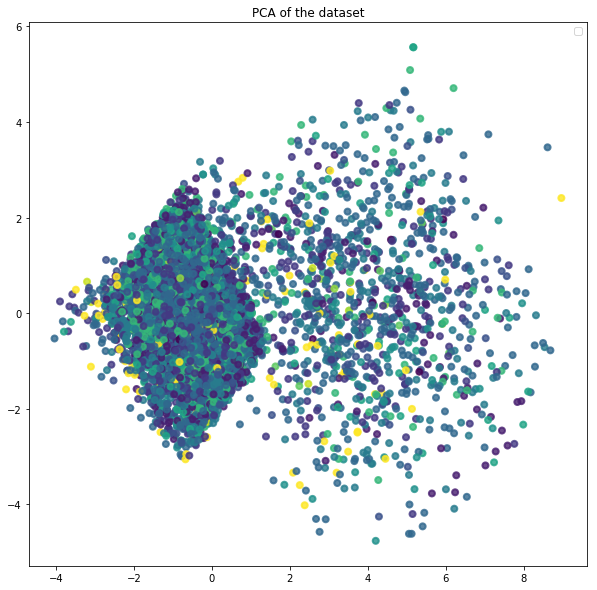

In [20]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]

plt.figure(figsize=(10, 10))
plt.scatter(arr_pca[:, 0], arr_pca[:, 1], c=train_data['class'], alpha=.8, lw=2)
plt.legend()
plt.title('PCA of the dataset')

Text(0.5, 1.0, 'PCA of the dataset')

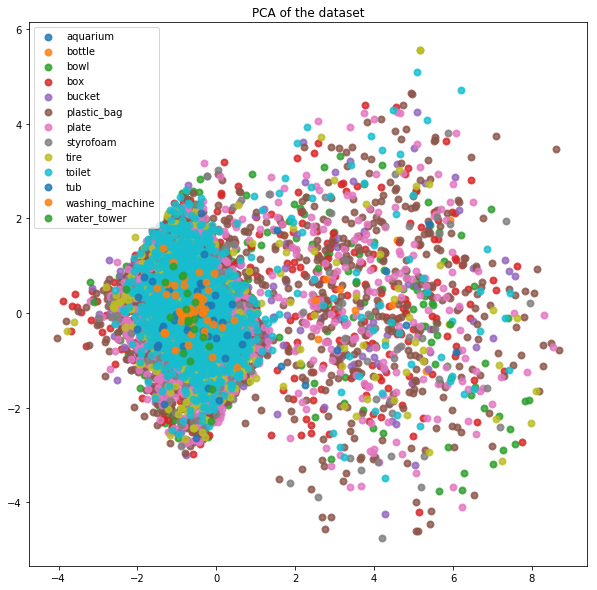

In [21]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]
colors = ['navy', 'turquoise', 'darkorange', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'coral', 'olive', 'teal']


plt.figure(figsize=(10, 10))
for color, i, la in zip(colors, range(13), labels):
    plt.scatter(arr_pca[y == i, 0], arr_pca[y == i, 1], alpha=.8, lw=2,
                label=la)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

In [22]:
group = train_data.groupby('class')


In [23]:
group.size()

class
1.0       34
2.0      650
3.0     1115
4.0      558
5.0     2200
6.0     1047
7.0      264
8.0      410
9.0     1357
10.0      46
11.0      55
12.0      25
13.0     174
dtype: int64

In [24]:
group.get_group(1.0).mean()

width     450.235294
height    348.176471
depth       3.000000
class       1.000000
xmin      103.794118
ymin       99.823529
xmax      312.852941
ymax      285.647059
dtype: float64